<a href="https://colab.research.google.com/github/mrmamadi/regression10/blob/checking_data/EDA_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#@title Import data
import pandas as pd
from datetime import datetime
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

train_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EDSA/2 Machine Learning/1 Regression/4 Predict/Data Original/Train.csv')
test_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EDSA/2 Machine Learning/1 Regression/4 Predict/Data Original/Test.csv')
rider_data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EDSA/2 Machine Learning/1 Regression/4 Predict/Data Original/Riders.csv')

raw_train = train_data.copy()

train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=1)

raw_train = train_data.copy()

# First check on data (Info)

Calling ```.info()``` reveals:
- train_data
  - 21201 entries 29 columns
    - 10 string columns
      - <font color=red> expected all time columns to be intergers </font> **action required**
        - because values contain text (AM and PM)
        - <font color=red> convert columns to seconds </font> because response variable given in seconds
    - Categorical columns
      - Order number 
        - order numbering does not make sense (so can't use it to make time series plots)
      - User ID
        - Categorical column
        - Not sure how to use this
      - <font color=red>Vehicle type</font>
        - All motocycles so we can <font color=red> delete this column </font>
      - Rider ID
        - Categorical column 
        - <font color=red> delete because we feel that average rating is the important information </font>
          - has high number of unique values
      - Business or Personal
        - Convert to 0 or 1 (1 for Business)

    - 13 integer64 columns
    - 6 float64 columns
      - Temperature and precipitation have missing values (4366/20.6% and 20649/97.4% respectively)
      - **action required**
        - <font color=red> Precipitation column </font>
          - there are no zero rain precipitation values, 
            - don't think it rains 365 days a year in East Africa
            - so assumption is that empty cells are meant for instances where it wasn't raining
            - <font color=red> filled with zeros </font>
            - also create new column that categorizes into ordinal variable of precipitation
              - 0 (<30)
              - 1 (30 <= precitpation < 70)
              - 2 (precitpation >= 70)
        - <font color=red> Temperature columns </font>
          - mean and median are pretty similar and there doesn't seem to be any outliers so choice doesn't matter (distribution can be approximated as normal)
            - all empty entries will be <font color=red>filled with median </font> of hour of the day
              - because temperature taken very 3 hours of day
              - created a dataframe for average temperature for every our

- test_data
  - 7068 entries 25 columns
    - 10 string columns
    - 10 int64 columns
    - 6 float columns
______
Discrepency in number of integer columns 
- 1 was expect but 4 found **action required**
  - missing columns in test data
    - <font color='red'> Arrival at Destination - Day of Month', 'Arrival at Destination - Weekday (Mo = 1)', 'Arrival at Destination - Time', 'Time from Pickup to Arrival' </font>
    - was only expecting 'Time from Pickup to Arrival' to be missing
    - I think we should <font color='red'> delete these columns </font> becuase it will be difficult combine them without the year information 
      - we are also not going to use them to fit the data
______

Looking through data it appears that some columns are very similar **action required**
- train data
  - Placement and confirmation day of month (same as Weekday info)
    - only 2 columns are have different days (1 and 2 days)
  - Pickup and Arrival at Pickup - Day of Month (same as Weekday info)
    - columns are identical

- test data
  - Placement and confirmation day of month (same as Weekday info)
    - columns are identical
  - Pickup and Arrival at Pickup - Day of Month (same as Weekday info)
    - columns are identical

In general I would argue that <font color='blue'>everything tends to happen in 1 day </font>. It would suggest we only use the day information in converting  time to seconds and thus <font color='red'> delete the placement, confirmation, arrival pickup and arrival destination day information information</font>. 
  - We should consider deleting placement time column becuase I don't think it add any information.
____

Convert <font color=red>time info to seconds </font> (match with the response variable) **attention required**
Check time columns (arrival and confirmation times)
  - keep time columns and delete depending on model behaviour (add column for time difference between confirmation and pickup)
    - It could give insights about the place it's being picked up at
      - e.g. Like remote locations would take longer to get to


___






In [2]:
train_data.info()
print('\n')
rider_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16960 entries, 15274 to 235
Data columns (total 29 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   16960 non-null  object 
 1   User Id                                    16960 non-null  object 
 2   Vehicle Type                               16960 non-null  object 
 3   Platform Type                              16960 non-null  int64  
 4   Personal or Business                       16960 non-null  object 
 5   Placement - Day of Month                   16960 non-null  int64  
 6   Placement - Weekday (Mo = 1)               16960 non-null  int64  
 7   Placement - Time                           16960 non-null  object 
 8   Confirmation - Day of Month                16960 non-null  int64  
 9   Confirmation - Weekday (Mo = 1)            16960 non-null  int64  
 10  Confirmation - Time 

In [3]:
#@title Check user id and rider_id
print(f"different user_id's train data: {train_data['User Id'].nunique()} from {len(train_data)}")
print(f"different user_id's test data: {test_data['User Id'].nunique()} from {len(test_data)}")
print(f"different user_id's test data: {rider_data['Rider Id'].nunique()} from {len(rider_data)}")


different user_id's train data: 2791 from 16960
different user_id's test data: 1617 from 7068
different user_id's test data: 960 from 960


In [4]:
#@title Drop Vehicle Type and convert Business/Personal column *

train_data.drop(columns= ['Vehicle Type'], inplace=True)
test_data.drop(columns= ['Vehicle Type'], inplace=True)

train_data['Personal or Business'] = train_data['Personal or Business'].apply(lambda x: 1 if x=='Business' else 0)
test_data['Personal or Business'] = test_data['Personal or Business'].apply(lambda x: 1 if x=='Business' else 0)

val_data['Personal or Business'] = val_data['Personal or Business'].apply(lambda x: 1 if x=='Business' else 0)

print("Vehicle Type removed and Business changed to categorical")


Vehicle Type removed and Business changed to categorical


In [5]:
#@title  Confirm that columns are similar (And that everything happens in the same day)

def print_row(df, column1, column2, additional_text = ""):
  """
  function prints out number of rows containing different values between 
  column1 and column2 of dataframe df
  """
  diff_rows = (df[df[column1] != df[column2]]).shape[0]
  print(f"[{column1}] vs [{column2}] has {diff_rows} different entries {additional_text}")

# Placement vs Confirmation columns
print("_"*110+'\n')
print(" "*int((110)/2-16)+"Placement vs Confirmation columns")
print("_"*110)

print_row(
    train_data, 
    'Placement - Day of Month', 
    'Confirmation - Day of Month', 
    'in train data')

print_row(
    test_data, 
    'Placement - Day of Month', 
    'Confirmation - Day of Month', 
    'in test data')

print_row(
    train_data, 
    'Placement - Weekday (Mo = 1)', 
    'Confirmation - Weekday (Mo = 1)', 
    'in train data')

print_row(
    test_data, 
    'Placement - Weekday (Mo = 1)', 
    'Confirmation - Weekday (Mo = 1)', 
    'in test data')

print(f"\n rows that has different confirmation and placement \n {train_data[train_data['Placement - Day of Month']!=train_data['Confirmation - Day of Month']]['Order No']}")


#Confirmation vs Arrival at pickup columns
print("_"*110+'\n')
print(" "*int((110)/2-16)+"Confirmation vs Arrival at pickup columns")
print("_"*110)

print_row(
    train_data, 
    'Arrival at Pickup - Day of Month', 
    'Confirmation - Day of Month', 
    'in train data')

print_row(
    test_data, 
    'Arrival at Pickup - Day of Month', 
    'Confirmation - Day of Month', 
    'in test data')

print_row(
    train_data, 
    'Arrival at Pickup - Weekday (Mo = 1)', 
    'Confirmation - Weekday (Mo = 1)', 
    'in train data')

print_row(
    test_data, 
    'Arrival at Pickup - Weekday (Mo = 1)', 
    'Confirmation - Weekday (Mo = 1)', 
    'in test data')


# Pickup vs Arrival at pickup columns
print("_"*110+'\n')
print(" "*int((110)/2-16)+"Pickup vs Arrival at pickup columns")
print("_"*110)
print_row(
    train_data, 
    'Pickup - Day of Month', 
    'Arrival at Pickup - Day of Month', 
    'in train data')

print_row(
    test_data, 
    'Pickup - Day of Month', 
    'Arrival at Pickup - Day of Month', 
    'in test data')

print_row(
    train_data, 
    'Pickup - Weekday (Mo = 1)', 
    'Arrival at Pickup - Weekday (Mo = 1)', 
    'in train data')

print_row(
    test_data, 
    'Pickup - Weekday (Mo = 1)', 
    'Arrival at Pickup - Weekday (Mo = 1)', 
    'in test data')


# Pickup vs Arrival at Destination columns
print("_"*110+'\n')
print(" "*int((110)/2-16)+"Pickup vs Arrival at pickup columns")
print("_"*110)

print_row(
    train_data, 
    'Arrival at Destination - Day of Month', 
    'Pickup - Day of Month', 
    'in train data')

print_row(
    train_data, 
    'Arrival at Destination - Weekday (Mo = 1)', 
    'Pickup - Weekday (Mo = 1)', 
    'in train data')

______________________________________________________________________________________________________________

                                       Placement vs Confirmation columns
______________________________________________________________________________________________________________
[Placement - Day of Month] vs [Confirmation - Day of Month] has 2 different entries in train data
[Placement - Day of Month] vs [Confirmation - Day of Month] has 0 different entries in test data
[Placement - Weekday (Mo = 1)] vs [Confirmation - Weekday (Mo = 1)] has 2 different entries in train data
[Placement - Weekday (Mo = 1)] vs [Confirmation - Weekday (Mo = 1)] has 0 different entries in test data

 rows that has different confirmation and placement 
 4024    Order_No_2800
9804    Order_No_3530
Name: Order No, dtype: object
______________________________________________________________________________________________________________

                                       Confirmation vs Ar

In [6]:
#@title Drop those 2 rows

train_data = train_data[train_data['Placement - Day of Month']==train_data['Confirmation - Day of Month']]
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16958 entries, 15274 to 235
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   16958 non-null  object 
 1   User Id                                    16958 non-null  object 
 2   Platform Type                              16958 non-null  int64  
 3   Personal or Business                       16958 non-null  int64  
 4   Placement - Day of Month                   16958 non-null  int64  
 5   Placement - Weekday (Mo = 1)               16958 non-null  int64  
 6   Placement - Time                           16958 non-null  object 
 7   Confirmation - Day of Month                16958 non-null  int64  
 8   Confirmation - Weekday (Mo = 1)            16958 non-null  int64  
 9   Confirmation - Time                        16958 non-null  object 
 10  Arrival at Pickup - 

## Handle missing values in Temperature and precipitation columns



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


minimum precipitation measured is 0.1mm


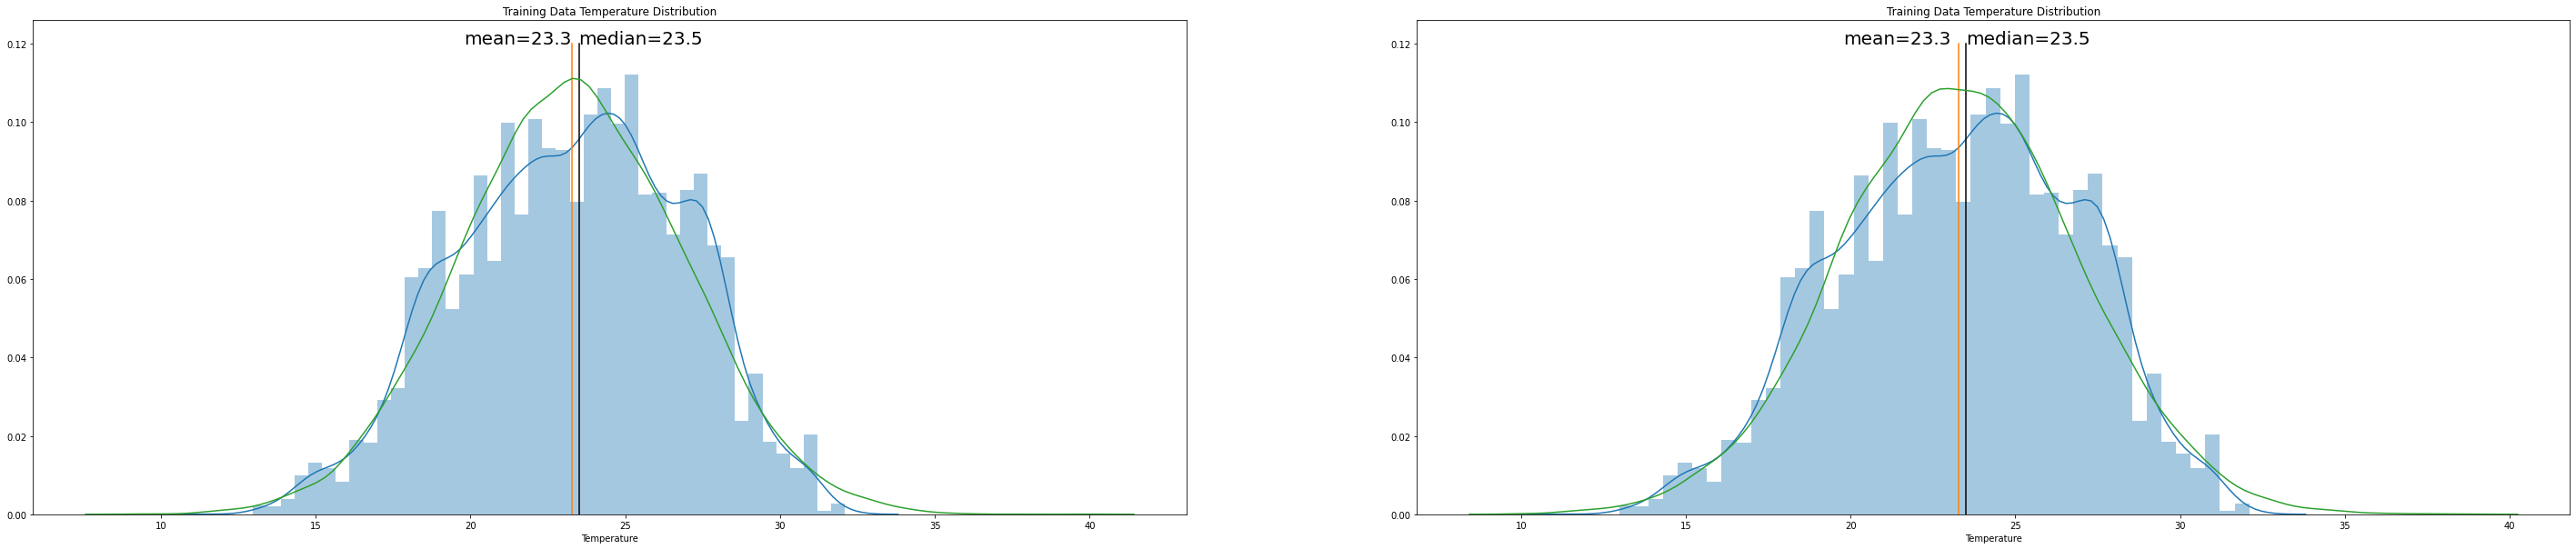

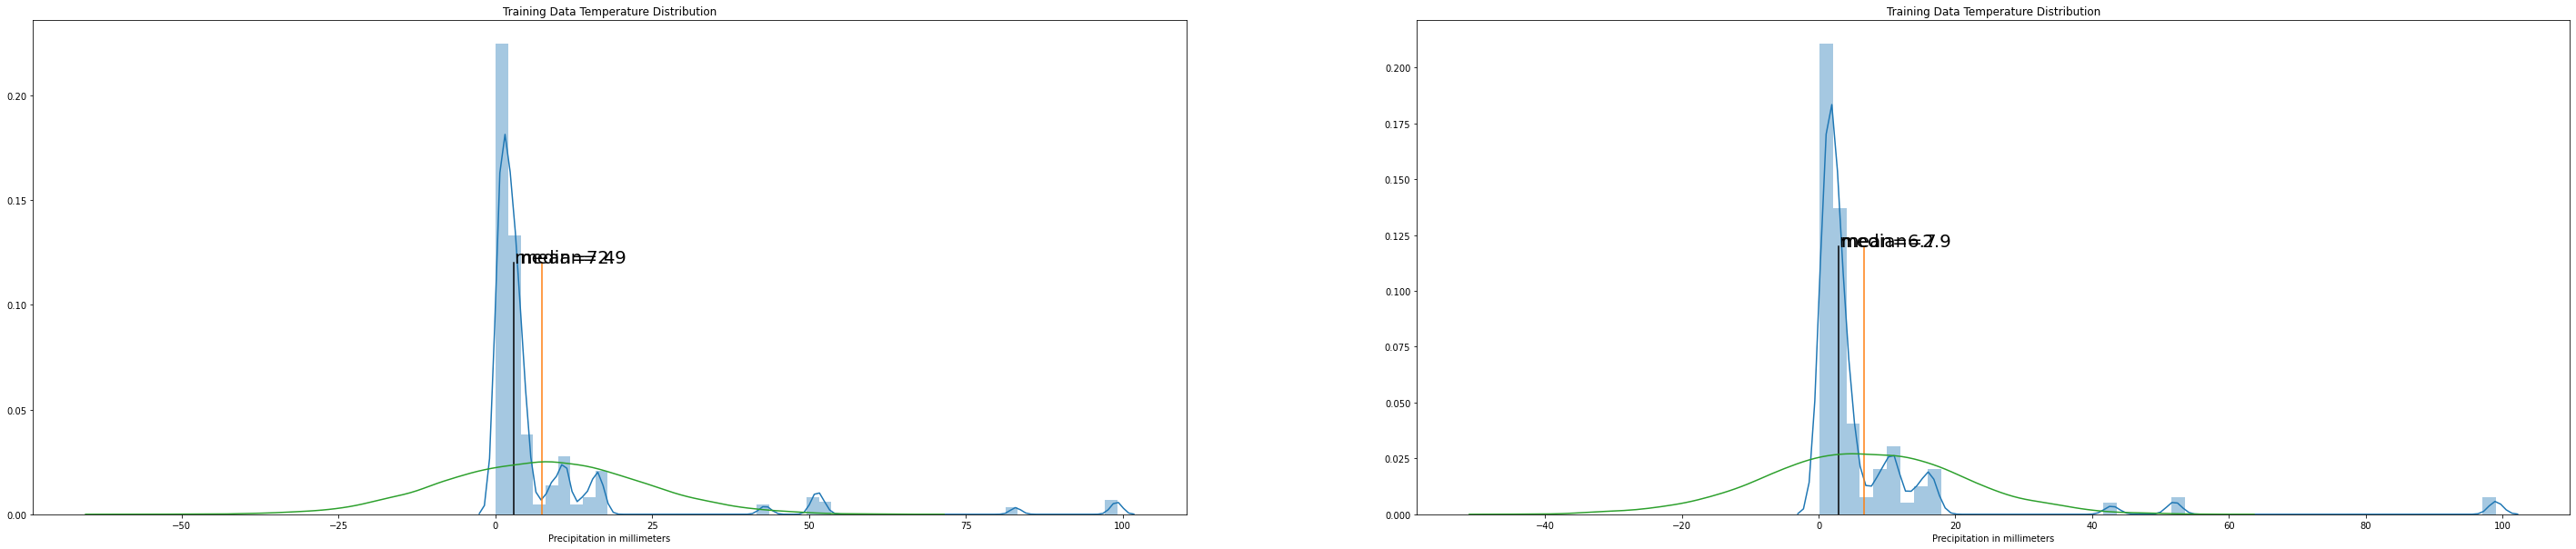

In [7]:
# @title Check Precipitation and temperature columns
import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import numpy as np

rain = train_data["Precipitation in millimeters"]
print(f"minimum precipitation measured is {rain.min()}mm")

rcParams['figure.figsize'] = 50, 10

f, axes = plt.subplots(1, 2)

temps = train_data['Temperature']
sns.distplot(temps, ax=axes[0])
axes[0].plot([temps.mean(), temps.mean()],[0,0.12])
axes[0].plot([temps.median(), temps.median()],[0,0.12], color='k')
axes[0].text(x=temps.median(),y=.12, s=f'median={temps.median()}', fontsize=20)
axes[0].text(temps.mean()-3.5,.12, f'mean={round(temps.mean(),1)}', fontsize=20)
sns.kdeplot(np.random.normal(temps.mean(), temps.std(), temps.shape), ax=axes[0])
axes[0].set_title('Training Data Temperature Distribution')

temps = train_data['Temperature']
sns.distplot(temps, ax=axes[1])
axes[1].plot([temps.mean(), temps.mean()],[0,0.12])
axes[1].plot([temps.median(), temps.median()],[0,0.12], color='k')
axes[1].text(temps.median(),.12, f'median={temps.median()}', fontsize=20)
axes[1].text(temps.mean()-3.5,.12, f'mean={round(temps.mean(),1)}', fontsize=20)
sns.kdeplot(np.random.normal(temps.mean(), temps.std(), temps.shape), ax=axes[1])
axes[1].set_title('Training Data Temperature Distribution')
plt.show()

f, axes = plt.subplots(1, 2)

temps = train_data['Precipitation in millimeters']
sns.distplot(temps, ax=axes[0])
axes[0].plot([temps.mean(), temps.mean()],[0,0.12])
axes[0].plot([temps.median(), temps.median()],[0,0.12], color='k')
axes[0].text(x=temps.median(),y=.12, s=f'median={temps.median()}', fontsize=20)
axes[0].text(temps.mean()-3.5,.12, f'mean={round(temps.mean(),1)}', fontsize=20)
sns.kdeplot(np.random.normal(temps.mean(), temps.std(), temps.shape), ax=axes[0])
axes[0].set_title('Training Data Temperature Distribution')

temps = test_data['Precipitation in millimeters']
sns.distplot(temps, ax=axes[1])
axes[1].plot([temps.mean(), temps.mean()],[0,0.12])
axes[1].plot([temps.median(), temps.median()],[0,0.12], color='k')
axes[1].text(temps.median(),.12, f'median={temps.median()}', fontsize=20)
axes[1].text(temps.mean()-3.5,.12, f'mean={round(temps.mean(),1)}', fontsize=20)
sns.kdeplot(np.random.normal(temps.mean(), temps.std(), temps.shape), ax=axes[1])
axes[1].set_title('Training Data Temperature Distribution')
plt.show()

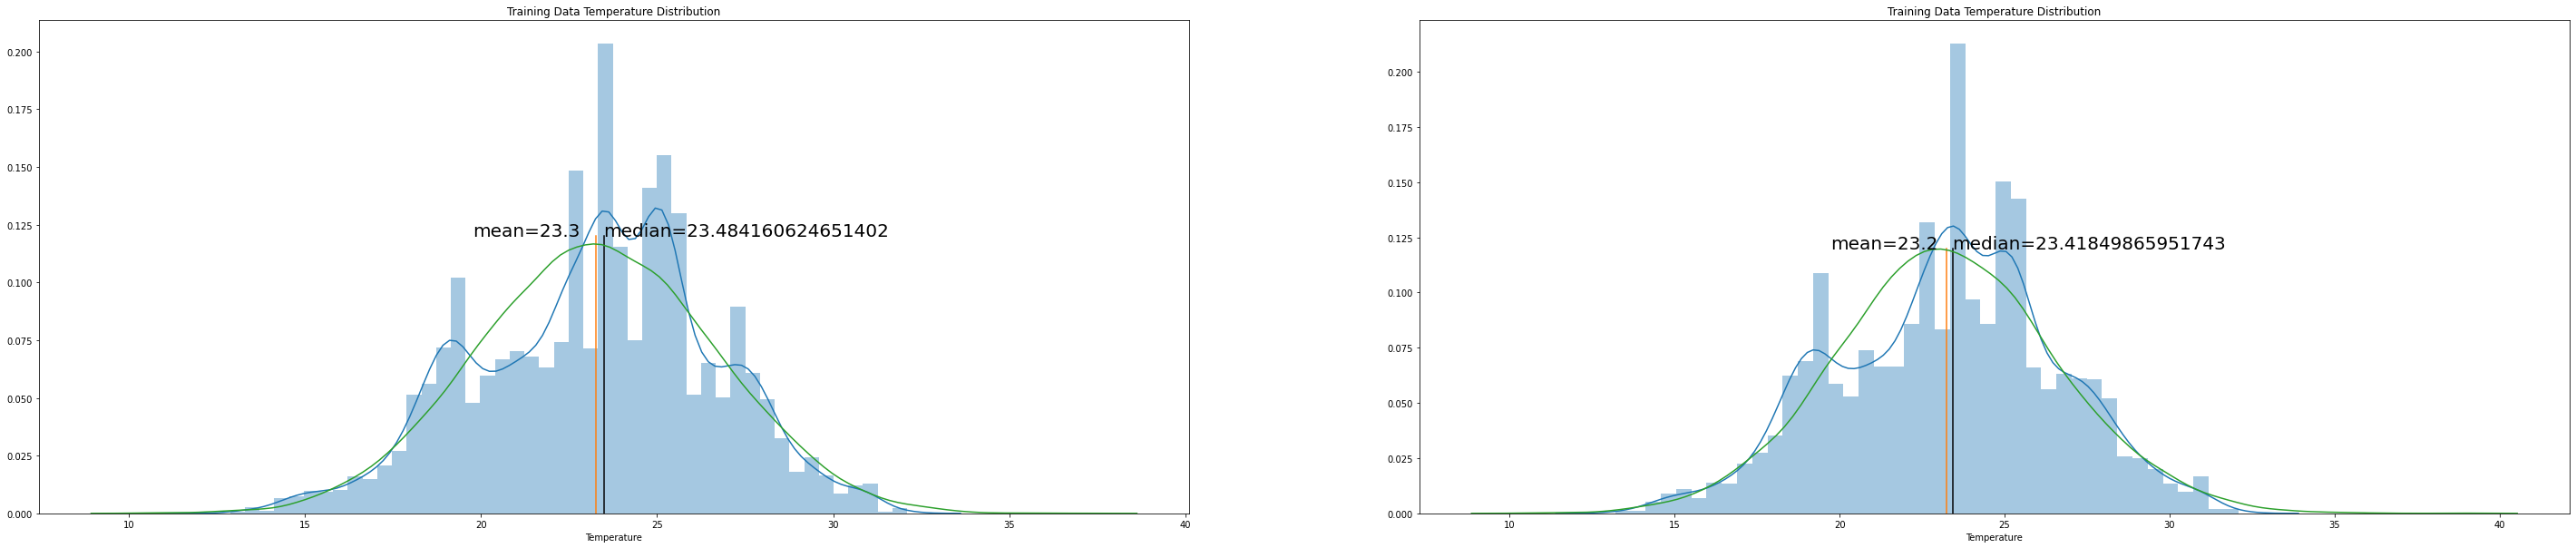

In [8]:
#@title Fill nulls in Precipitation, Temperature columns, create Precipitation Category column '#'
from sklearn.impute import SimpleImputer
from itertools import compress
import seaborn as sns
from matplotlib import rcParams

def impute_temperature(df_impute, train_data = raw_train):
  df = df_impute.copy()
  data = train_data.copy()

  data['temp_plcmnt_time'] = pd.to_datetime(data['Placement - Time']).dt.strftime('%H')
  avg_temps = data.groupby(['temp_plcmnt_time'])['Temperature'].mean().to_frame().reset_index()

  df['temp_plcmnt_time'] = pd.to_datetime(df['Placement - Time']).dt.strftime('%H')

  df = df.merge(avg_temps, on='temp_plcmnt_time', how='left', suffixes=('', '2'))
  df.loc[df['Temperature'].isnull(),'Temperature'] = df.loc[df['Temperature'].isnull(),'Temperature2']
  df.drop(columns=['temp_plcmnt_time', 'Temperature2'], inplace=True)
  return df



#Precipitation
rain_imputer = SimpleImputer(strategy='constant', fill_value=0)
rain_imputer.fit(train_data['Precipitation in millimeters'].values.reshape(-1,1))

train_data['Precipitation in millimeters']= rain_imputer.transform(
                train_data['Precipitation in millimeters'].values.reshape(-1,1))
test_data['Precipitation in millimeters']= rain_imputer.transform(
                test_data['Precipitation in millimeters'].values.reshape(-1,1))

val_data['Precipitation in millimeters']= rain_imputer.transform(
                val_data['Precipitation in millimeters'].values.reshape(-1,1)) #

#Create Precipitation Column
get_cat = lambda x: list(compress([0,1,2],[x<30, x>=30 and x<70, x>70]))[0]

train_data['Precipitation Category'] = train_data['Precipitation in millimeters'].apply(get_cat)
test_data['Precipitation Category'] = test_data['Precipitation in millimeters'].apply(get_cat)

val_data['Precipitation Category'] = val_data['Precipitation in millimeters'].apply(get_cat) #

# Temperatures
test_data =  impute_temperature(test_data, raw_train)
train_data = impute_temperature(train_data, raw_train)

val_data = impute_temperature(val_data, raw_train) #

f, axes = plt.subplots(1, 2)

temps = train_data['Temperature']
sns.distplot(temps, ax=axes[0])
axes[0].plot([temps.mean(), temps.mean()],[0,0.12])
axes[0].plot([temps.median(), temps.median()],[0,0.12], color='k')
axes[0].text(x=temps.median(),y=.12, s=f'median={temps.median()}', fontsize=20)
axes[0].text(temps.mean()-3.5,.12, f'mean={round(temps.mean(),1)}', fontsize=20)
sns.kdeplot(np.random.normal(temps.mean(), temps.std(), temps.shape), ax=axes[0])
axes[0].set_title('Training Data Temperature Distribution')

temps = test_data['Temperature']
sns.distplot(temps, ax=axes[1])
axes[1].plot([temps.mean(), temps.mean()],[0,0.12])
axes[1].plot([temps.median(), temps.median()],[0,0.12], color='k')
axes[1].text(temps.median(),.12, f'median={temps.median()}', fontsize=20)
axes[1].text(temps.mean()-3.5,.12, f'mean={round(temps.mean(),1)}', fontsize=20)
sns.kdeplot(np.random.normal(temps.mean(), temps.std(), temps.shape), ax=axes[1])
axes[1].set_title('Training Data Temperature Distribution')
plt.show()


In [9]:
val_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4241 entries, 0 to 4240
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Order No                                   4241 non-null   object 
 1   User Id                                    4241 non-null   object 
 2   Vehicle Type                               4241 non-null   object 
 3   Platform Type                              4241 non-null   int64  
 4   Personal or Business                       4241 non-null   int64  
 5   Placement - Day of Month                   4241 non-null   int64  
 6   Placement - Weekday (Mo = 1)               4241 non-null   int64  
 7   Placement - Time                           4241 non-null   object 
 8   Confirmation - Day of Month                4241 non-null   int64  
 9   Confirmation - Weekday (Mo = 1)            4241 non-null   int64  
 10  Confirmation - Time     

## Look at time information

In [10]:
#@title Convert time information to seconds '#'
def convert_to_time(df):
  '''Changes all columns containing "Time" in title to time objects
      Midnight day of pickup is the zero point'''
  pick_up_day = 'Pickup - Day of Month'
  for column in df.columns:
    if ("Time" in column) and ("Pickup to Arrival" not in column):
      try:
        curr_day_col = column[:-4] + "Day of Month"
        df[column] = pd.to_datetime(df[column], format='%I:%M:%S %p').dt.time
        if ('Placement' in column) or ('Confirmation' in column):
          df[column] = df.apply(
              lambda t: (t[curr_day_col]-t[pick_up_day])*24*60*60 - (24*60*60 - (t[column].hour * 60 + t[column].minute) * 60 + t[column].second), 
              axis=1
              )
        else:
          df[column] = df.apply(
              lambda t: (t[curr_day_col]-t[pick_up_day])*24*60*60 + (t[column].hour * 60 + t[column].minute) * 60 + t[column].second, 
              axis=1
              )
      except ValueError:
        print(f"'{column}' column is already a time object'")
  return df

convert_to_time(train_data)
convert_to_time(test_data)
convert_to_time(val_data) #



Order No  ... Precipitation Category
0      Order_No_4551  ...                      0
1      Order_No_5399  ...                      0
2       Order_No_811  ...                      0
3     Order_No_12016  ...                      0
4      Order_No_3353  ...                      0
...              ...  ...                    ...
4236   Order_No_6939  ...                      0
4237  Order_No_14252  ...                      0
4238  Order_No_20954  ...                      0
4239  Order_No_12032  ...                      0
4240   Order_No_8130  ...                      0

[4241 rows x 30 columns]

In [0]:
#@title Add Time from Confirmation to Pickup Column '#'
train_data['Time from Confirmation to Pickup'] = train_data['Pickup - Time']-train_data['Confirmation - Time']
test_data['Time from Confirmation to Pickup'] = test_data['Pickup - Time']-test_data['Confirmation - Time']

val_data['Time from Confirmation to Pickup'] = val_data['Pickup - Time']-val_data['Confirmation - Time']

In [12]:
#@title Check missing integer columns (missing from test data)

#get column names
train_cols = train_data.columns
test_cols = test_data.columns

#compare column names
missing_columns = [train_column for train_column in train_cols if (train_column not in test_cols)]
print(f"following columns are missing from test set: {missing_columns}")



following columns are missing from test set: ['Arrival at Destination - Day of Month', 'Arrival at Destination - Weekday (Mo = 1)', 'Arrival at Destination - Time', 'Time from Pickup to Arrival']


In [13]:
#@title Remove placement, confirmation, arrival pickup and arrival destination day information information. '#'
train_data.drop(
    columns=[
             'Placement - Day of Month', 
             'Placement - Weekday (Mo = 1)',
             'Confirmation - Day of Month',
             'Confirmation - Weekday (Mo = 1)',
             'Arrival at Pickup - Day of Month', 
             'Arrival at Pickup - Weekday (Mo = 1)',
             'Pickup - Day of Month',
             'Pickup - Weekday (Mo = 1)',
             'Arrival at Destination - Day of Month',
             'Arrival at Destination - Weekday (Mo = 1)'
            ],
    inplace=True)

deleted_columns=[
             'Placement - Day of Month', 
             'Placement - Weekday (Mo = 1)',
             'Confirmation - Day of Month',
             'Confirmation - Weekday (Mo = 1)',
             'Arrival at Pickup - Day of Month', 
             'Arrival at Pickup - Weekday (Mo = 1)',
             'Pickup - Day of Month',
             'Pickup - Weekday (Mo = 1)',
             'Arrival at Destination - Day of Month',
             'Arrival at Destination - Weekday (Mo = 1)'
            ]
print(f'following columns are dropped from training data: {deleted_columns}')

test_data.drop(
    columns=[
             'Placement - Day of Month', 
             'Placement - Weekday (Mo = 1)',
             'Confirmation - Day of Month',
             'Confirmation - Weekday (Mo = 1)',
             'Arrival at Pickup - Day of Month', 
             'Arrival at Pickup - Weekday (Mo = 1)',
             'Pickup - Day of Month',
             'Pickup - Weekday (Mo = 1)',
            ],
    inplace=True)

deleted_columns=[
          'Placement - Day of Month', 
          'Placement - Weekday (Mo = 1)',
          'Confirmation - Day of Month',
          'Confirmation - Weekday (Mo = 1)',
          'Arrival at Pickup - Day of Month', 
          'Arrival at Pickup - Weekday (Mo = 1)',
          'Pickup - Day of Month',
          'Pickup - Weekday (Mo = 1)',
          ]
print(f'following columns are dropped from test data: {deleted_columns}')

print('done')

val_data.drop(
    columns=[
             'Placement - Day of Month', 
             'Placement - Weekday (Mo = 1)',
             'Confirmation - Day of Month',
             'Confirmation - Weekday (Mo = 1)',
             'Arrival at Pickup - Day of Month', 
             'Arrival at Pickup - Weekday (Mo = 1)',
             'Pickup - Day of Month',
             'Pickup - Weekday (Mo = 1)',
            ],
    inplace=True)



following columns are dropped from training data: ['Placement - Day of Month', 'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)', 'Arrival at Destination - Day of Month', 'Arrival at Destination - Weekday (Mo = 1)']
following columns are dropped from test data: ['Placement - Day of Month', 'Placement - Weekday (Mo = 1)', 'Confirmation - Day of Month', 'Confirmation - Weekday (Mo = 1)', 'Arrival at Pickup - Day of Month', 'Arrival at Pickup - Weekday (Mo = 1)', 'Pickup - Day of Month', 'Pickup - Weekday (Mo = 1)']
done


In [0]:
#@title Remove Placement time column '#'
if 'Placement - Time' in train_data.columns:
  train_data.drop(columns=['Placement - Time'], inplace=True)
  test_data.drop(columns= ['Placement - Time'], inplace=True)

if 'Placement - Time' in val_data.columns:
  val_data.drop(columns= ['Placement - Time'], inplace=True)



# Second Check (Describe)

- notice
  - Categorical numerical columns
    - Platform type
      - platform 3 is very dominent
  - Precipitation data does not look greate with the added zeros
    - consider converting it to a categorical column of rain no rain (depending on mm level)
  - data scales are very different
    - consider standard scaler

Add rider data to test and train sets
  - now we can delete rider ID column

- data scales are very different
  - consider standard scaler
    - all columns excluding (Platform type and geographic information)



In [0]:
# train_data.describe()
# test_data.describe()
# rider_data.describe()
# val_data.head()

In [16]:
#@ title Convert Platform type into dummy variables '#'

not_dummied = len(set(['Platform Type: 2', 'Platform Type: 3', 'Platform Type: 4']) & set(train_data.columns)) == 0

if not_dummied:
  combined_df = pd.concat([train_data, test_data])
  combined_df = pd.get_dummies(data=combined_df, prefix=['Platform Type:'], drop_first=True, prefix_sep=' ',columns=['Platform Type'])
  train_data = combined_df.iloc[:len(train_data), :]
  train_data.drop(columns=['Arrival at Destination - Time'], inplace=True)
  test_data = combined_df.iloc[-len(test_data):, :]
  test_data.drop(columns=['Arrival at Destination - Time', 'Time from Pickup to Arrival'], inplace=True)

##########
not_dummied = len(set(['Platform Type: 2', 'Platform Type: 3', 'Platform Type: 4']) & set(val_data.columns)) == 0
if not_dummied:
  for i in ['Platform Type: 2', 'Platform Type: 3', 'Platform Type: 4']:
    val_data[i] = val_data['Platform Type'].apply(lambda x: 1 if (x==int(i[-1])) else 0)


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [17]:
val_data

Order No       User Id  ... Platform Type: 3  Platform Type: 4
0      Order_No_4551  User_Id_3283  ...                1                 0
1      Order_No_5399  User_Id_1724  ...                1                 0
2       Order_No_811   User_Id_283  ...                1                 0
3     Order_No_12016  User_Id_1500  ...                1                 0
4      Order_No_3353   User_Id_868  ...                1                 0
...              ...           ...  ...              ...               ...
4236   Order_No_6939  User_Id_1363  ...                1                 0
4237  Order_No_14252  User_Id_2112  ...                1                 0
4238  Order_No_20954  User_Id_1746  ...                1                 0
4239  Order_No_12032  User_Id_3324  ...                0                 0
4240   Order_No_8130   User_Id_391  ...                1                 0

[4241 rows x 25 columns]

In [18]:
#@title Combine Rider table to order tables drop rider_id
if 'Age' not in train_data.columns:
  train_data = train_data.merge(rider_data, how='left', left_on='Rider Id', right_on='Rider Id', left_index=True)
  test_data = test_data.merge(rider_data, how='left', left_on='Rider Id', right_on='Rider Id', left_index=True)
  train_data.drop(columns='Rider Id', inplace=True)
  test_data.drop(columns='Rider Id', inplace=True)

if 'Age' not in val_data.columns:
  val_data = val_data.merge(rider_data, how='left', left_on='Rider Id', right_on='Rider Id', left_index=True)
  val_data.drop(columns='Rider Id', inplace=True)
  val_data.set_index('Order No')


train_data.set_index('Order No')
test_data.set_index('Order No')


User Id  ...  No_of_Ratings
Order No                      ...               
Order_No_19248  User_Id_3355  ...            171
Order_No_12736  User_Id_3647  ...             45
Order_No_768    User_Id_2154  ...             67
Order_No_15332  User_Id_2910  ...             44
Order_No_21373  User_Id_1205  ...           1010
...                      ...  ...            ...
Order_No_3612   User_Id_2587  ...             87
Order_No_7657   User_Id_3547  ...           2027
Order_No_1969    User_Id_136  ...            441
Order_No_10591  User_Id_1979  ...             66
Order_No_1603   User_Id_1721  ...            108

[7068 rows x 21 columns]

In [0]:
#@title Standard Scaler '#'
from sklearn.preprocessing import StandardScaler

train_x = train_data.drop(columns=['Time from Pickup to Arrival'])
train_y = train_data[['Order No', 'Time from Pickup to Arrival']]

columns_to_scale = ['Confirmation - Time', 
                    'Time from Confirmation to Pickup',
                    'Arrival at Pickup - Time',
                    'Pickup - Time',
                    'Distance (KM)',
                    'Temperature',
                    'Precipitation in millimeters',
                    'No_Of_Orders',
                    'Age',
                    'Average_Rating',
                    'No_of_Ratings']
#Scale
sc = StandardScaler()

train_x[columns_to_scale] = sc.fit_transform(train_x[columns_to_scale])
test_data[columns_to_scale] = sc.transform(test_data[columns_to_scale])

###
val_y = val_data.drop(columns=['Time from Pickup to Arrival'])
val_x = sc.transform(val_data[columns_to_scale])

In [20]:
test_data[columns_to_scale]

Confirmation - Time  ...  No_of_Ratings
183             1.493439  ...      -0.423154
826             0.016573  ...      -0.736952
650            -0.599665  ...      -0.682162
561             0.370241  ...      -0.739442
203            -0.544917  ...       1.666338
..                   ...  ...            ...
611            -0.914900  ...      -0.632353
119             0.807125  ...       4.199131
134             0.710879  ...       0.249269
205             0.933264  ...      -0.684652
785             1.091484  ...      -0.580053

[7068 rows x 11 columns]

# Plot scaled data (Check for collinearity)

## Pair Plot on training data
It appears as if the time columns have outliers with very low time values
  - at below -5 for scaled variables (12 am)
    - it is unusual to be making requests at midnight. 
      - Thus we remove it
  - Are they valid or not?
identified relationship
- Number of orders appears linearly correlated with number of ratings
- 
- Number of ratings
  - riders that have the most ratings tend to have Higher average ratings
  - Linear relationship with number of orders 
  - <font color='red'> there appears to be gap in the standardized data (between 3 and 4 or 1550 and 1950)</font>
- Average ratings
  - None
- Age
  - slight Linear relation with No of orders
- No of orders

- Precipitation
  - Data appears to be in clumps might be a good idea to consider makeing it a categorical column for different levers of rain
    - appears to be 3 categories/classes 
      - up to 10, 10 to 20, above 20

- time columns appear to be linearly related 
  - <font color='red'> might be because of taking pickup day as zero </font>
  - consider dropping all time columns excluding the pickup and take the difference between confirmation and pickup

<font color='red'> it appears the time columns have an outlier <font color='red'>


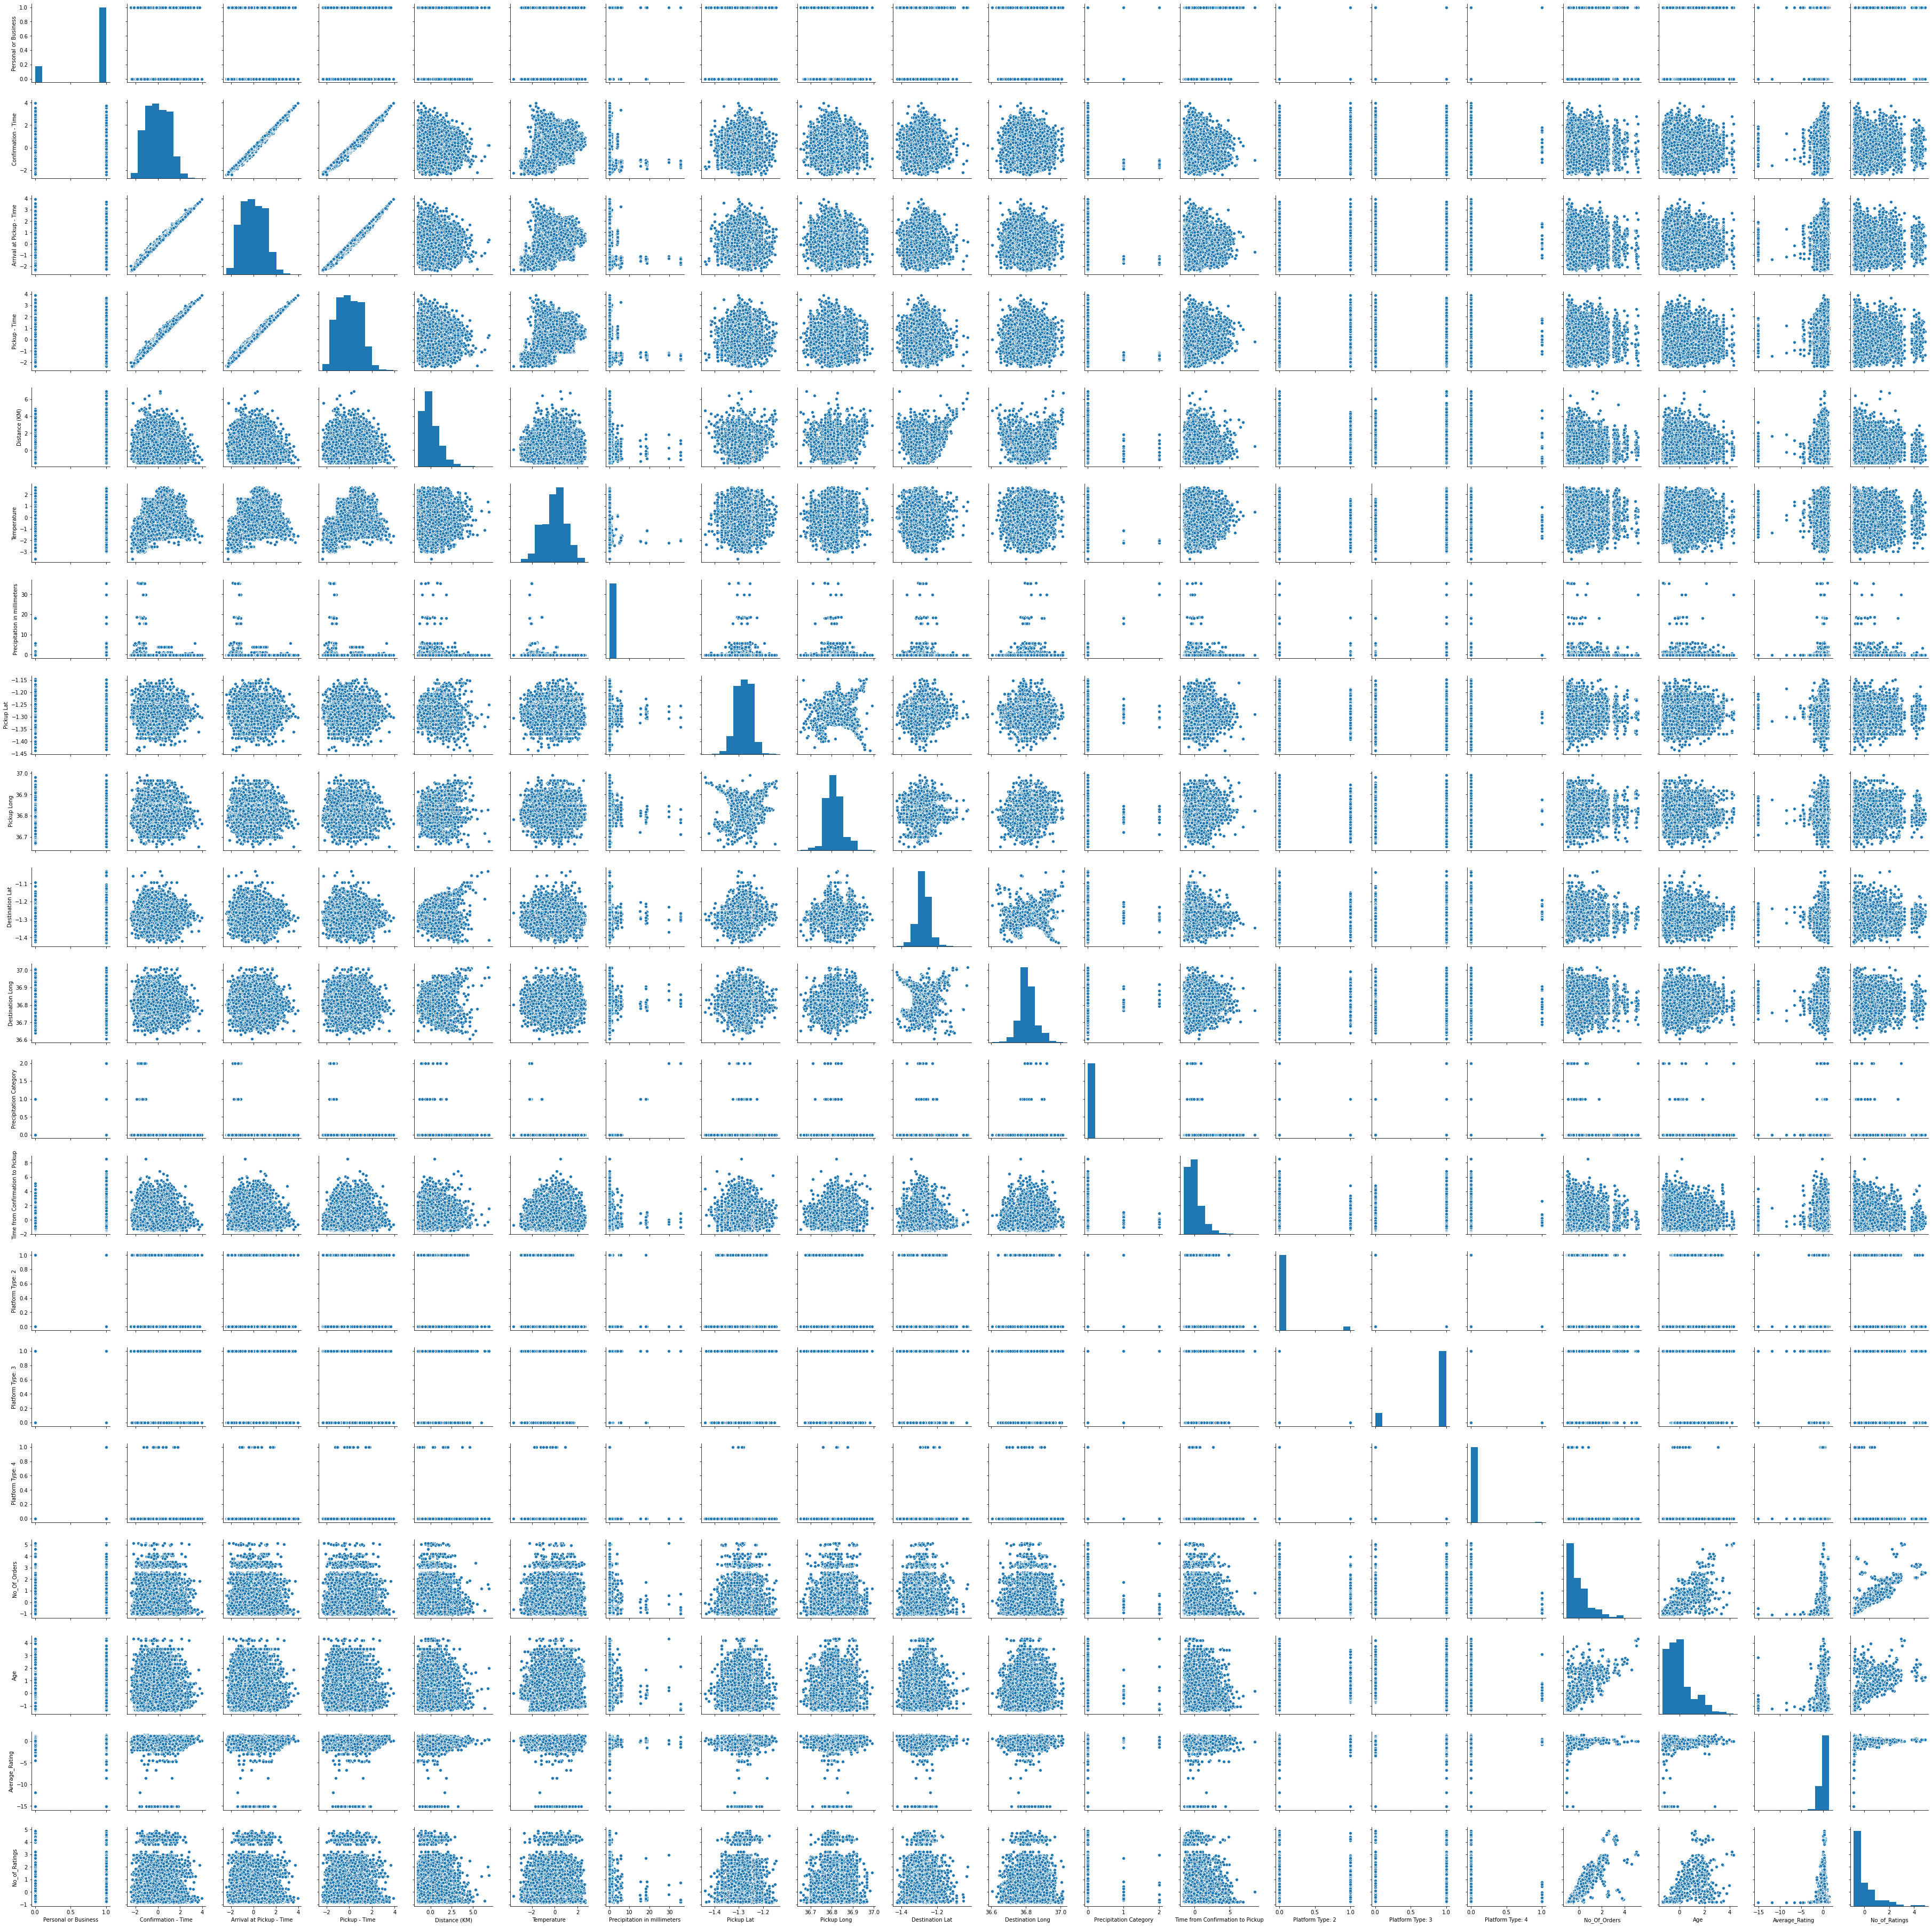

In [21]:
#@title Train Data Pair-Plots
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(train_x[train_x['Arrival at Pickup - Time']>=-5])
plt.show()

In [22]:
#@title Check and remove midnight order
data1 = train_x[train_x['Arrival at Pickup - Time']<-5]
data = sc.inverse_transform(data1[columns_to_scale])
outliers = pd.DataFrame(data=data, columns = columns_to_scale, index=data1['Order No']).index
print(f"The outlier rows are from {list(outliers.values)}")

original = pd.read_csv('/content/drive/My Drive/Colab Notebooks/EDSA/2 Machine Learning/1 Regression/4 Predict/Data Original/Train.csv')

order_num_removed = list(outliers.values)[0]
train_x = train_x[train_x['Order No']!=order_num_removed]
train_y = train_y[train_y['Order No']!=order_num_removed]


The outlier rows are from ['Order_No_952']


In [23]:
train_x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16957 entries, 877 to 68
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Order No                          16957 non-null  object 
 1   User Id                           16957 non-null  object 
 2   Personal or Business              16957 non-null  int64  
 3   Confirmation - Time               16957 non-null  float64
 4   Arrival at Pickup - Time          16957 non-null  float64
 5   Pickup - Time                     16957 non-null  float64
 6   Distance (KM)                     16957 non-null  float64
 7   Temperature                       16957 non-null  float64
 8   Precipitation in millimeters      16957 non-null  float64
 9   Pickup Lat                        16957 non-null  float64
 10  Pickup Long                       16957 non-null  float64
 11  Destination Lat                   16957 non-null  float64
 12  Desti

## Corr map
- Personal or Business
  - strong Negative correlation between platform type 2 and bussiness
    - implies platform 2 is rarely used for business
  - strong positive correlation between type 3 and bussiness
    - implies usually used for business
  
- Strong correlation between all time columns
  - not all seem logically important operation
    - Keep time difference (Confirmation to pickup) and pickup time

- Temperature
  - Small positive correlation with all time columns

- Platform type 2
  - Strong positive correlation with platform type 3
  - concider deleting 1 dummy variable
    - preferably delete type 2 because most data is either type 2 or all the others
      - delete if stats agree

  
- No of orders 
  - strong correlation with no rating
  - moderate correlation with age
  - all 3 seem important 
    - use stats to delete

 





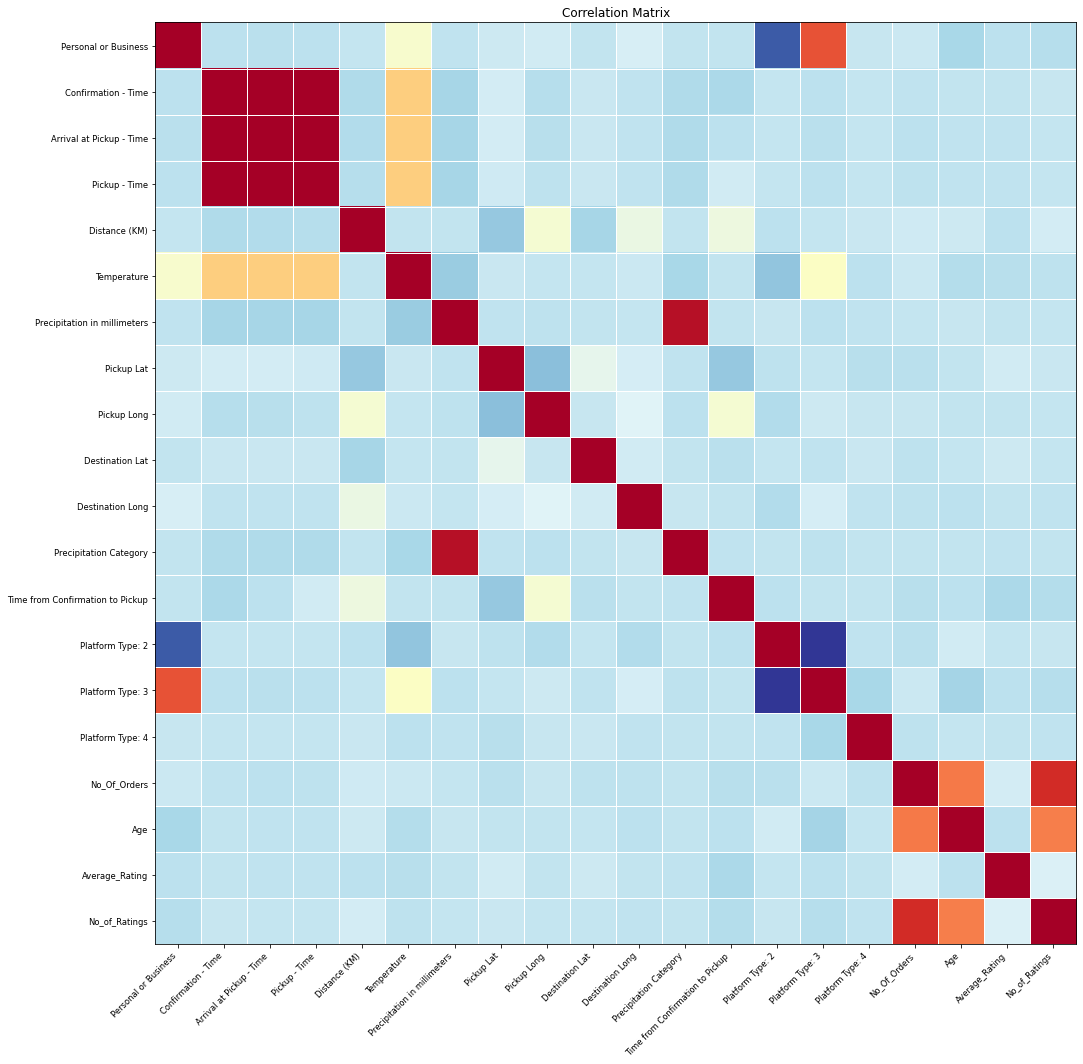

In [24]:
#@title Train Data Correlation plots
from statsmodels.graphics.correlation import plot_corr

fig = plt.figure(figsize=(15,15));
ax = fig.add_subplot(111);
plot_corr(train_x.corr(), xnames = train_x.corr().columns, ax = ax);

# Fit using stats model

- Check model quality to see information about linearity
  - drop the coordinates data because they don't make sense on their own and it's difficult to combine them for OLS fit
    - drop: Pickup Lat, 	Pickup Long, 	Destination Lat,	Destination Long
  - drop User id column
  - Multi collinearity warning


In [25]:
#@title Fit OLS model on almost all the numerical data
from statsmodels.formula.api import ols

# Model DataFrame with all of the columns:
df = train_x.merge(train_y, on='Order No').set_index('Order No')
df = df.drop(columns = ['User Id', 'Pickup Lat','Pickup Long', 'Destination Lat', 'Destination Long'])


# The dependent variable:
y_name = "Q('Time from Pickup to Arrival')"
# The independent variable
# (let's first try all of the columns in the model DataFrame)
X_names = [f"Q('{col}')" for col in df.columns if (col != 'Time from Pickup to Arrival')]

# # Build the OLS formula string " y ~ X "
formula_str = y_name+" ~ "+" + ".join(X_names);
print('Formula:\n\t {}'.format(formula_str))

# Fit the model using the model dataframe
model=ols(formula=formula_str, data=df)
fitted = model.fit()

# Output the fitted summary
print(fitted.summary())

Formula:
	 Q('Time from Pickup to Arrival') ~ Q('Personal or Business') + Q('Confirmation - Time') + Q('Arrival at Pickup - Time') + Q('Pickup - Time') + Q('Distance (KM)') + Q('Temperature') + Q('Precipitation in millimeters') + Q('Precipitation Category') + Q('Time from Confirmation to Pickup') + Q('Platform Type: 2') + Q('Platform Type: 3') + Q('Platform Type: 4') + Q('No_Of_Orders') + Q('Age') + Q('Average_Rating') + Q('No_of_Ratings')
                                   OLS Regression Results                                   
Dep. Variable:     Q('Time from Pickup to Arrival')   R-squared:                       0.374
Model:                                          OLS   Adj. R-squared:                  0.373
Method:                               Least Squares   F-statistic:                     674.8
Date:                              Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                                      17:21:25   Log-Likelihood:            -1.3705e+0

## Select by Correlationa and significance

- All the correlated features in correlation plot must be studied
  - comparing pvalues and correlation coefficient when compared to response
  - On their own 
    - only Distance (KM), Average_Rating, No_Of_Orders, Time from Confirmation to Pickup, Arrival at Pickup - Time, Temperature are statiscally significant when plotted individually against 'Time from Confirmation to Pickup'
    - checking auto-correlation on these variables
      - It appear non of them are significantly correlated with eachother (i.e. |corr|<0.9)
      - R squared and adjusted $R^2$ are small 0.35
      - The Temperature p-value implies it's possible that temperature isn't a good choice for independent variable in multiple linear regression
        - 95%CI for coefficient is almost twice as big as selected value
        - even with temperature removed R-squared remains unchanged
          - it's coefficient was very small
      - Durban-Watson $\approx 2$ so almost no autocorrelation
      






In [26]:
from scipy.stats import pearsonr

# Calculate correlations between predictor variables and the response variable
corrs = df.corr()['Time from Pickup to Arrival'].sort_values(ascending=False)

# Build a dictionary of correlation coefficients and p-values
dict_cp = {}

column_titles = [col for col in corrs.index if col!= 'Time from Pickup to Arrival']
for col in column_titles:
    p_val = round(pearsonr(df[col], df['Time from Pickup to Arrival'])[1],6)
    dict_cp[col] = {'Correlation_Coefficient':corrs[col],
                    'P_Value':p_val}
    
df_cp = pd.DataFrame(dict_cp).T
df_cp_sorted = df_cp.sort_values('P_Value')
df_cp_sorted#[df_cp_sorted['P_Value']<0.1]

Correlation_Coefficient   P_Value
Distance (KM)                                    0.580199  0.000000
Time from Confirmation to Pickup                 0.056133  0.000000
Average_Rating                                  -0.047108  0.000000
No_Of_Orders                                    -0.047462  0.000000
Arrival at Pickup - Time                         0.020052  0.009021
Temperature                                      0.017142  0.025603
Age                                             -0.014484  0.059284
Pickup - Time                                    0.013177  0.086191
Personal or Business                            -0.011991  0.118422
Precipitation Category                           0.007596  0.322600
Confirmation - Time                              0.007136  0.352769
Precipitation in millimeters                     0.007025  0.360338
Platform Type: 2                                -0.004522  0.555956
Platform Type: 4                                 0.002399  0.754709
Platform Type: 3                                 0.000372  0.961381
No_of_Ratings                                   -0.000061  0.993612

In [27]:
#@title Checking for Autocorrelation (Are features linearly correlated)

# The dependent variable remains the same:
y_data = df['Time from Confirmation to Pickup']  # y_name = 'Loan_Size'

# Model building - Independent Variable (IV) DataFrame
X_names = list(df_cp[df_cp['P_Value'] < 0.05].index)
X_data = df[X_names]

# Create the correlation matrix
corr = X_data.corr()

# Find rows and columnd where correlation coefficients > 0.9 or <-0.9
corr[np.abs(corr) > 0.9]


Distance (KM)  ...  No_Of_Orders
Distance (KM)                               1.0  ...           NaN
Time from Confirmation to Pickup            NaN  ...           NaN
Arrival at Pickup - Time                    NaN  ...           NaN
Temperature                                 NaN  ...           NaN
Average_Rating                              NaN  ...           NaN
No_Of_Orders                                NaN  ...           1.0

[6 rows x 6 columns]

# Refit OLS with only the features (by themselves) that are linearly correlated with response 



In [28]:
# Lets take a new subset of our potential independent variables
X_names = ['Distance (KM)', 'Time from Confirmation to Pickup', 
          'Arrival at Pickup - Time', 'Temperature', 'Average_Rating', 'No_Of_Orders']

X_corr_names = [f"Q('{col}')" for col in X_names]

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=df)
fitted = model.fit()

# Display the fitted summary
print(fitted.summary())

Formula:
	Q('Time from Pickup to Arrival') ~ Q('Distance (KM)') + Q('Time from Confirmation to Pickup') + Q('Arrival at Pickup - Time') + Q('Temperature') + Q('Average_Rating') + Q('No_Of_Orders')
                                   OLS Regression Results                                   
Dep. Variable:     Q('Time from Pickup to Arrival')   R-squared:                       0.346
Model:                                          OLS   Adj. R-squared:                  0.346
Method:                               Least Squares   F-statistic:                     1493.
Date:                              Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                                      17:21:25   Log-Likelihood:            -1.3743e+05
No. Observations:                             16957   AIC:                         2.749e+05
Df Residuals:                                 16950   BIC:                         2.749e+05
Df Model:                                         6        

In [29]:
#@ title When Temperature is removed
X_names = ['Distance (KM)', 'Time from Confirmation to Pickup', 
          'Arrival at Pickup - Time', 'Average_Rating', 'No_Of_Orders']

X_corr_names = [f"Q('{col}')" for col in X_names if col]

# Create our new OLS formula based-upon our smaller subset
formula_str = y_name+' ~ '+' + '.join(X_corr_names);
print('Formula:\n\t{}'.format(formula_str))

# Fit the OLS model using the model dataframe
model=ols(formula=formula_str, data=df)
fitted = model.fit()

# Display the fitted summary
print(X_corr_names)
print(fitted.summary())

X_names

Formula:
	Q('Time from Pickup to Arrival') ~ Q('Distance (KM)') + Q('Time from Confirmation to Pickup') + Q('Arrival at Pickup - Time') + Q('Average_Rating') + Q('No_Of_Orders')
["Q('Distance (KM)')", "Q('Time from Confirmation to Pickup')", "Q('Arrival at Pickup - Time')", "Q('Average_Rating')", "Q('No_Of_Orders')"]
                                   OLS Regression Results                                   
Dep. Variable:     Q('Time from Pickup to Arrival')   R-squared:                       0.346
Model:                                          OLS   Adj. R-squared:                  0.346
Method:                               Least Squares   F-statistic:                     1792.
Date:                              Thu, 28 May 2020   Prob (F-statistic):               0.00
Time:                                      17:21:25   Log-Likelihood:            -1.3743e+05
No. Observations:                             16957   AIC:                         2.749e+05
Df Residuals:                 

['Distance (KM)',
 'Time from Confirmation to Pickup',
 'Arrival at Pickup - Time',
 'Average_Rating',
 'No_Of_Orders']

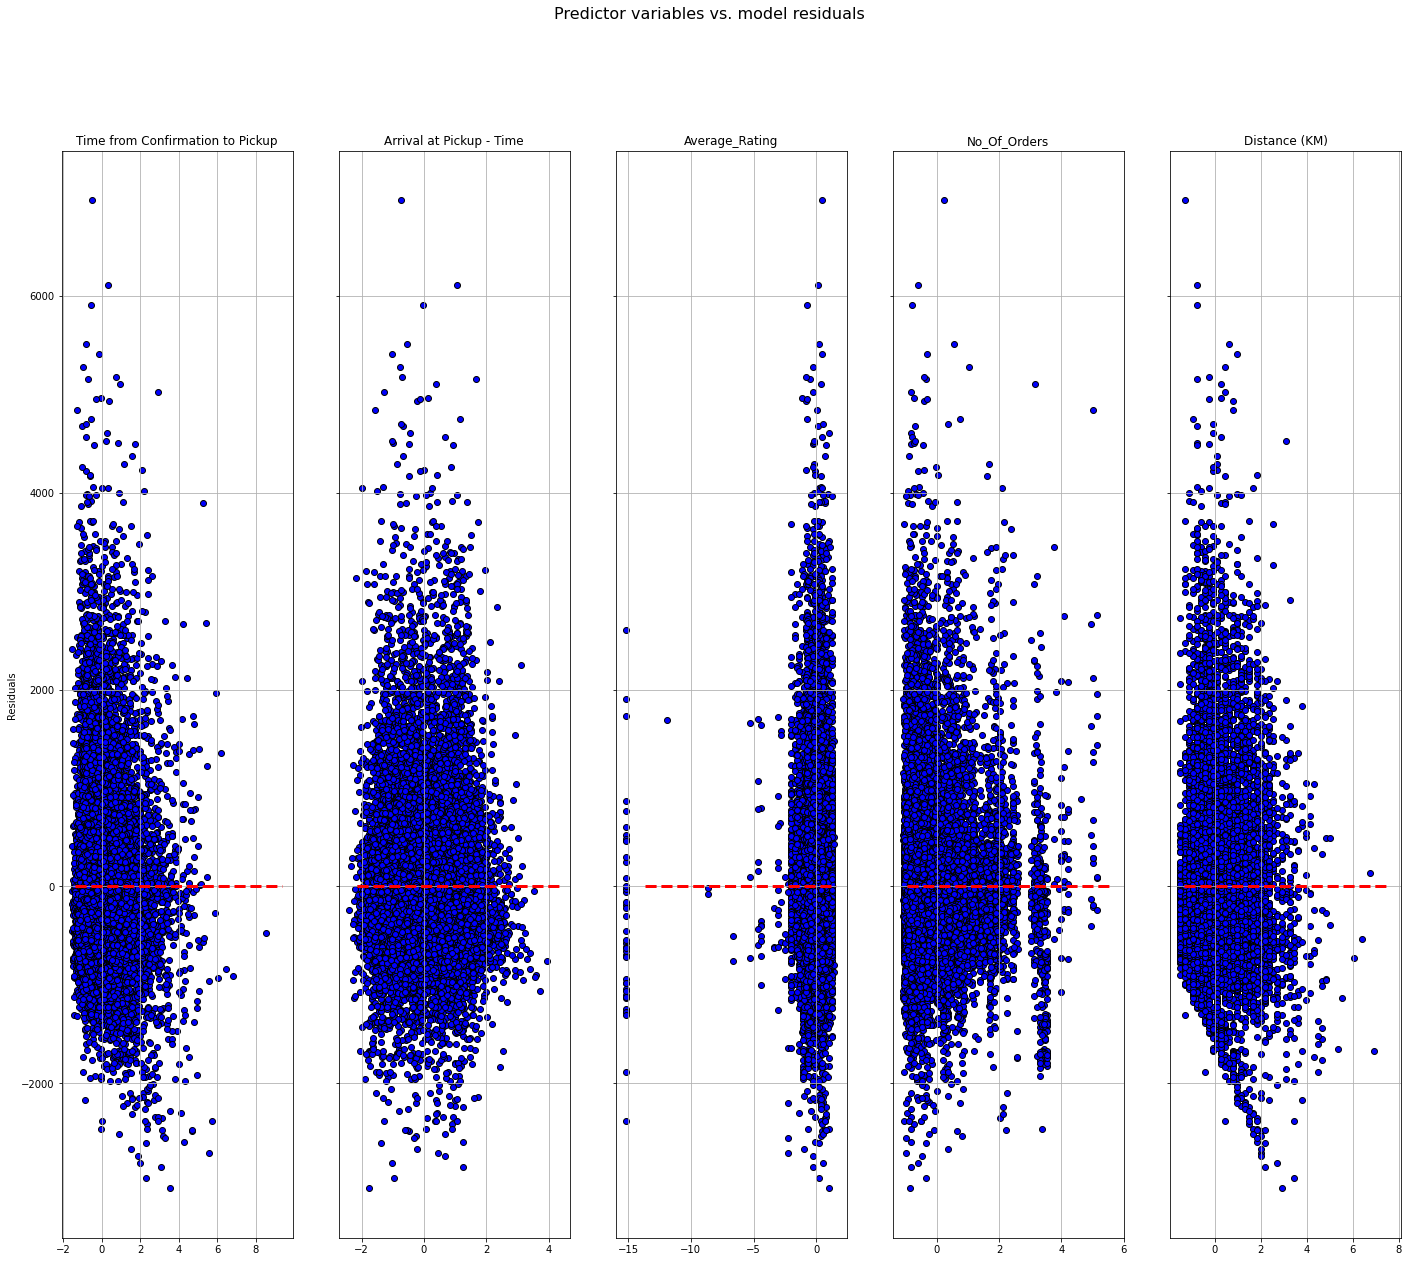

In [30]:
#@title Plot Residuals
fig, axs = plt.subplots(1,5, figsize=(24,20),sharey=True)
fig.subplots_adjust(hspace = 0.5, wspace=.2)
fig.suptitle('Predictor variables vs. model residuals', fontsize=16)
axs = axs.ravel()

for index, column in enumerate(X_names):
    axs[index-1].set_title("{}".format(column),fontsize=12)
    axs[index-1].scatter(x=df[column],y=fitted.resid,color='blue',edgecolor='k')
    axs[index-1].grid(True)
    xmin = min(df[column])
    xmax = max(df[column])
    axs[index-1].hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    if index == 1 or index == 6:
        axs[index-1].set_ylabel('Residuals')

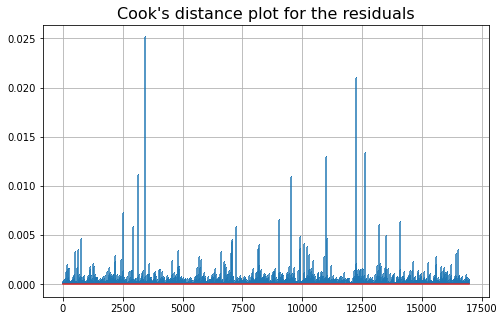

Mean Cook's distance:  7.064749315255769e-05


In [31]:
#@title Plotting Cooks distance
from statsmodels.stats.outliers_influence import OLSInfluence as influence

inf=influence(fitted)

(c, p) = inf.cooks_distance
plt.figure(figsize=(8,5))
plt.title("Cook's distance plot for the residuals",fontsize=16)
plt.stem(np.arange(len(c)), c, markerfmt=",", use_line_collection=True)
plt.grid(True)
plt.show()
print('Mean Cook\'s distance: ', c.mean())

# Fit Linear regression  using Scikit learn



In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr1 = LinearRegression()

lr1.fit(train_x[X_names], train_y['Time from Pickup to Arrival'])
mean_squared_error(lr1.predict(val_data[X_names]), val)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys


IndexError: ignored